# Sample ERP Study

This notebook iterates over each BIDS subject in this project's derivative, created in `quick_clean.ipynb`, then plots some traditional ERPs

This notebook assumes that the user followed and/or understood the concepts in:

* `explore_source.ipynb`
* `init_bids_study.ipynb`
* `quick_clean.ipynb`

The following cell imports the necessary packages this notebook requires, and prompts the user for the experimental events (defined as `conditions`) of interest.

Note that these conditions are **not** what is being compared, but instead everything that the user may ever want to use in a study wide comparison.

In [1]:
import mne, glob

conditions = ['face', 'house', 'press'] # Expected to be provided by the researcher on a per-study/experiment basis

To collect all of the epoched data to generate ERPs, all data is appended to a structure called the `averaging_dict`.

The code to generate this uses what is called a "dictionary comprehension".

The goal of the structure is for every condition of interest to be a key, and the value to be a list of waveforms. Each single waveform in the list is contributed by a subject at the given key/condition.

In [2]:
averaging_dict = {k:[] for k in conditions}
averaging_dict

{'face': [], 'house': [], 'press': []}

The `averaging_dict` is initialized to contain an empty list for every condition.

The following loop iterates over each subject in this project's derivative.

The `Epochs` object is briefly covered in the `explore_source.ipynb` notebook, and further documentation can be found [here](https://mne.tools/stable/generated/mne.Epochs.html).

The following codeblock and loop are annotated to guide researchers in modifying it to suit their own needs.

In [3]:
# Iterate over each subject's .fif file in this project's derivative
for file in glob.glob('../derivatives/quick_clean/sub-*/eeg/*.fif'):
    raw = mne.io.read_raw(file) # Read the given file
    events, event_dict = mne.events_from_annotations(raw) # Extract events
    
    # Call to epoch the data to discontinuous form
    epochs = mne.Epochs(
        raw,                    # What is being operated on
        events,                 # Reference to the events
        event_id=event_dict,    # Labelling for events
        tmin=-0.2,              # How many seconds BEFORE an event to consider; implies the baseline
        tmax=0.6,               # How many seconds AFTER an event to consider
        reject={'eeg': 150e-6}, # 150 µV peak-to-peak voltage rejection, as outlined in `explore_source.ipynb`
        preload=True,           # Load data to memory
    )

    # For each condition, append the current subject's averaged data to the averaging_dict
    for condition in conditions:
        averaging_dict[condition].append(epochs[condition].average())

Opening raw data file ../derivatives/quick_clean/sub-4/eeg/sub-4_eeg.fif...
    Range : 0 ... 266239 =      0.000 ...   259.999 secs
Ready.
Used Annotations descriptions: ['press/left', 'press/right', 'static/checker/left', 'static/checker/right', 'static/face/inverted', 'static/face/upright', 'static/house/inverted', 'static/house/upright']
Not setting metadata
384 matching events found
Setting baseline interval to [-0.2001953125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 384 events and 820 original time points ...
    Rejecting  epoch based on EEG : ['C1', 'C2', 'C3', 'C16', 'C17', 'C18', 'C32']
    Rejecting  epoch based on EEG : ['C1', 'C2', 'C17', 'C18', 'C32']
    Rejecting  epoch based on EEG : ['C1', 'C2', 'C17', 'C18', 'C32', 'D1']
    Rejecting  epoch based on EEG : ['C1', 'C2', 'C17', 'C18', 'C31', 'C32', 'D1']
    Rejecting  epoch based on EEG : ['C1', 'C2', 'C17', 'C18', 'C31', 'C32', 'D1']
    Rejecting  epoch based on 

We can now check to see if the `averaging_dict` is populated with all four tutorial subjects using another dictionary comprehension:

In [4]:
{k:len(v) for k,v in averaging_dict.items()}

{'face': 4, 'house': 4, 'press': 4}

MNE offers several helper functions for comparing between conditions.

As this is a simple tutorial, we will use `mne.viz.plot_compare_evokeds` to compare all conditions inside of `averaging_dict`.

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


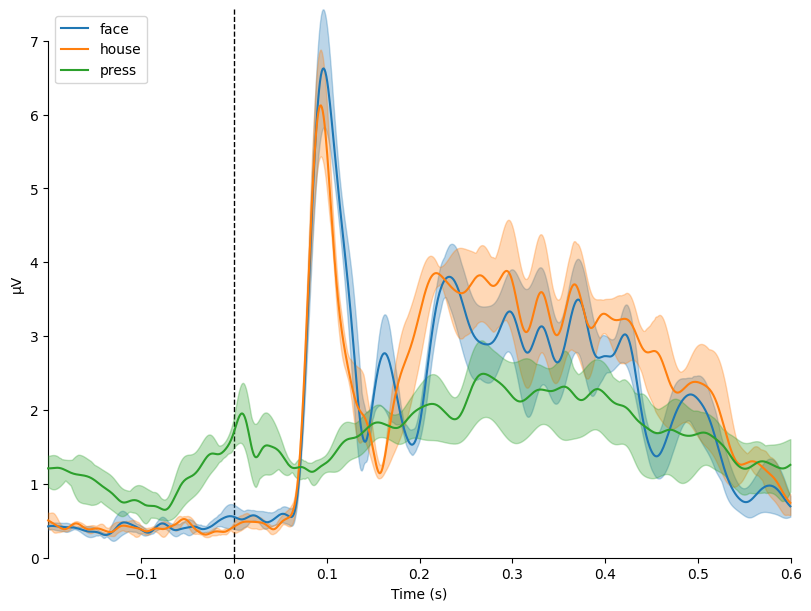

[<Figure size 800x600 with 1 Axes>]

In [5]:
mne.viz.plot_compare_evokeds(averaging_dict)

This figure may not appear instructive at first glance, but the default parameters of `mne.viz.plot_compare_evokeds` compute the Global Field Power (GFP) for all entries in the dictionary it receives.

To view a more standard ERP analysis the parameters can be changed as follows to view a single channel:

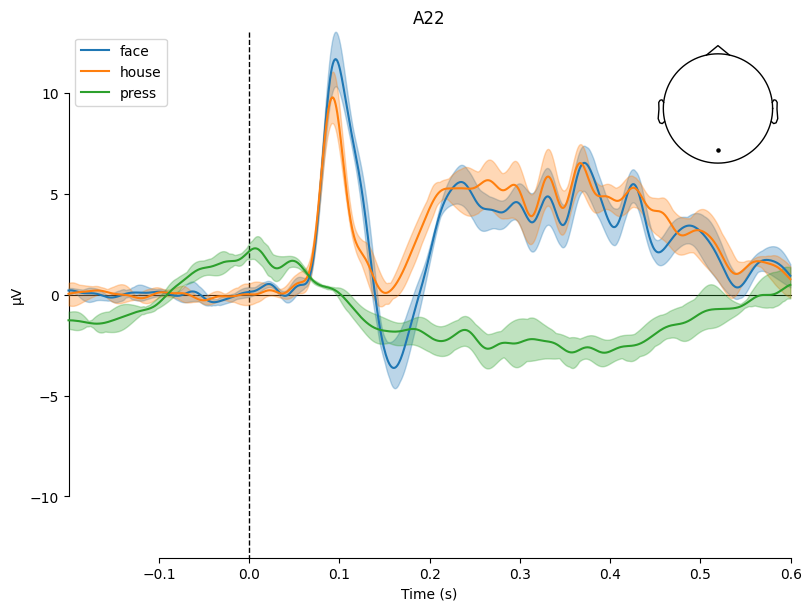

[<Figure size 800x600 with 2 Axes>]

In [6]:
mne.viz.plot_compare_evokeds(averaging_dict, picks=['A22'])

Or perhaps take the average of multiple channels:

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


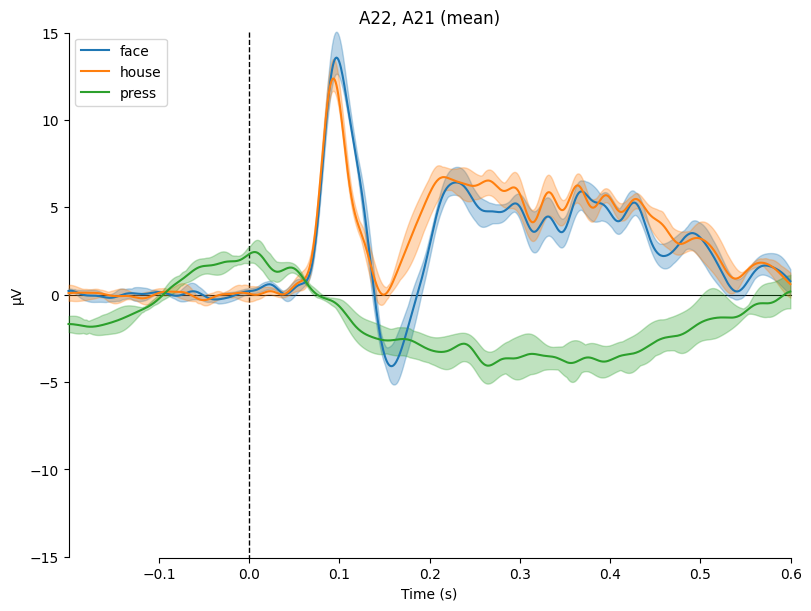

[<Figure size 800x600 with 1 Axes>]

In [7]:
mne.viz.plot_compare_evokeds(averaging_dict, picks=['A22', 'A21'], combine='mean')